## Projekt końcowy


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
#importing ploting libraries
import matplotlib.pyplot as plt
#importing seaborn for statistical plots
import seaborn as sns
#importing ploting libraries
import matplotlib.pyplot as plt
#styling figures
plt.rc('font',size=14)
sns.set(style='white')
sns.set(style='whitegrid',color_codes=True)
#To enable plotting graphs in Jupyter notebook
%matplotlib inline
#importing the feature scaling library
from sklearn.preprocessing import StandardScaler
#Import Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split
# Import Linear Regression, Ridge and Lasso machine learning library
from sklearn.linear_model import LinearRegression, Ridge, Lasso
# Import KNN Regressor machine learning library
from sklearn.neighbors import KNeighborsRegressor
# Import Decision Tree Regressor machine learning library
from sklearn.tree import DecisionTreeRegressor
# Import ensemble machine learning library
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor)
# Import support vector regressor machine learning library
from sklearn.svm import SVR
#Import the metrics
from sklearn import metrics
#Import the Voting regressor for Ensemble
from sklearn.ensemble import VotingRegressor
# Import stats from scipy
from scipy import stats
# Import zscore for scaling
from scipy.stats import zscore
#importing the metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
#importing the K fold
from sklearn.model_selection import KFold
#importing the cross validation score
from sklearn.model_selection import cross_val_score
#importing the preprocessing library
from sklearn import preprocessing
# importing the Polynomial features
from sklearn.preprocessing import PolynomialFeatures
#importing kmeans clustering library
from sklearn.cluster import KMeans
from sklearn.utils import resample

## Obróbka danych (Data Processing) 

In [2]:
loan_df = pd.read_csv(r'C:\Users\Monia\Desktop\Projekt końcowy\Loan_data (1).csv', low_memory=False)

In [3]:
loan_df

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501        NaN     5000.0       5000.0           4975.0   
1      1077430        NaN     2500.0       2500.0           2500.0   
2      1077175        NaN     2400.0       2400.0           2400.0   
3      1076863        NaN    10000.0      10000.0          10000.0   
4      1075358        NaN     3000.0       3000.0           3000.0   
...        ...        ...        ...          ...              ...   
42531    73582        NaN     3500.0       3500.0            225.0   
42532    72998        NaN     1000.0       1000.0              0.0   
42533    72176        NaN     2525.0       2525.0            225.0   
42534    71623        NaN     6500.0       6500.0              0.0   
42535    70686        NaN     5000.0       5000.0              0.0   

             term int_rate  installment grade sub_grade  ...  \
0       36 months   10.65%       162.87     B        B2  ...   
1       60 months   15.27%        59.83     C        C4  ...   
2       36 months   15.96%        84.33     C        C5  ...   
3       36 months   13.49%       339.31     C        C1  ...   
4       60 months   12.69%        67.79     B        B5  ...   
...           ...      ...          ...   ...       ...  ...   
42531   36 months   10.28%       113.39     C        C1  ...   
42532   36 months    9.64%        32.11     B        B4  ...   
42533   36 months    9.33%        80.69     B        B3  ...   
42534   36 months    8.38%       204.84     A        A5  ...   
42535   36 months    7.75%       156.11     A        A3  ...   

      hardship_payoff_balance_amount hardship_last_payment_amount  \
0                                NaN                          NaN   
1                                NaN                          NaN   
2                                NaN                          NaN   
3                                NaN                          NaN   
4                                NaN                          NaN   
...                              ...                          ...   
42531                            NaN                          NaN   
42532                            NaN                          NaN   
42533                            NaN                          NaN   
42534                            NaN                          NaN   
42535                            NaN                          NaN   

      disbursement_method  debt_settlement_flag debt_settlement_flag_date  \
0                    Cash                     N                       NaN   
1                    Cash                     N                       NaN   
2                    Cash                     N                       NaN   
3                    Cash                     N                       NaN   
4                    Cash                     N                       NaN   
...                   ...                   ...                       ...   
42531                Cash                     N                       NaN   
42532                Cash                     N                       NaN   
42533                Cash                     N                       NaN   
42534                Cash                     N                       NaN   
42535                Cash                     N                       NaN   

      settlement_status settlement_date settlement_amount  \
0                   NaN             NaN               NaN   
1                   NaN             NaN               NaN   
2                   NaN             NaN               NaN   
3                   NaN             NaN               NaN   
4                   NaN             NaN               NaN   
...                 ...             ...               ...   
42531               NaN             NaN               NaN   
42532               NaN             NaN               NaN   
42533               NaN             NaN               NaN   
42534               NaN             Na

In [4]:
#usunięcie kolumn, w którym wszystkie wartości są Nan
loan_df.dropna(axis=1, how='all', inplace = True)
loan_df

id  loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
0      1077501     5000.0       5000.0           4975.0   36 months   10.65%   
1      1077430     2500.0       2500.0           2500.0   60 months   15.27%   
2      1077175     2400.0       2400.0           2400.0   36 months   15.96%   
3      1076863    10000.0      10000.0          10000.0   36 months   13.49%   
4      1075358     3000.0       3000.0           3000.0   60 months   12.69%   
...        ...        ...          ...              ...         ...      ...   
42531    73582     3500.0       3500.0            225.0   36 months   10.28%   
42532    72998     1000.0       1000.0              0.0   36 months    9.64%   
42533    72176     2525.0       2525.0            225.0   36 months    9.33%   
42534    71623     6500.0       6500.0              0.0   36 months    8.38%   
42535    70686     5000.0       5000.0              0.0   36 months    7.75%   

       installment grade sub_grade                   emp_title  ... tax_liens  \
0           162.87     B        B2                         NaN  ...       0.0   
1            59.83     C        C4                       Ryder  ...       0.0   
2            84.33     C        C5                         NaN  ...       0.0   
3           339.31     C        C1         AIR RESOURCES BOARD  ...       0.0   
4            67.79     B        B5    University Medical Group  ...       0.0   
...            ...   ...       ...                         ...  ...       ...   
42531       113.39     C        C1                         NaN  ...       NaN   
42532        32.11     B        B4  Halping hands company inc.  ...       NaN   
42533        80.69     B        B3                         NaN  ...       NaN   
42534       204.84     A        A5                         NaN  ...       NaN   
42535       156.11     A        A3                   Homemaker  ...       NaN   

      hardship_flag  disbursement_method debt_settlement_flag  \
0                 N                 Cash                    N   
1                 N                 Cash                    N   
2                 N                 Cash                    N   
3                 N                 Cash                    N   
4                 N                 Cash                    N   
...             ...                  ...                  ...   
42531             N                 Cash                    N   
42532             N                 Cash                    N   
42533             N                 Cash                    N   
42534             N                 Cash                    N   
42535             N                 Cash                    N   

      debt_settlement_flag_date settlement_status settlement_date  \
0                           NaN               NaN             NaN   
1                           NaN               NaN             NaN   
2                           NaN               NaN             NaN   
3                           NaN               NaN             NaN   
4                           NaN               NaN             NaN   
...                         ...               ...             ...   
42531                       NaN               NaN             NaN   
42532                       NaN               NaN             NaN   
42533                       NaN               NaN             NaN   
42534                       NaN               NaN             NaN   
42535                       NaN               NaN             NaN   

      settlement_amount settlement_percentage settlement_term  
0                   NaN                   NaN             NaN  
1                   NaN                   NaN             NaN  
2                   NaN                   NaN             NaN  
3                   NaN                   NaN             NaN  
4                   NaN                   NaN             NaN  
...                 ...                   ...             ...  
42531               

In [5]:
#usunięcie niepotrzebnych danych
loan_df.drop(['id','funded_amnt','funded_amnt_inv','term','int_rate','installment','grade','sub_grade','emp_title','tax_liens','hardship_flag','disbursement_method','debt_settlement_flag','debt_settlement_flag_date','settlement_status','settlement_date','settlement_amount','settlement_percentage','settlement_term','verification_status','issue_d','pymnt_plan','url','desc','last_credit_pull_d','collections_12_mths_ex_med','policy_code','application_type','pub_rec_bankruptcies','purpose','title','zip_code','addr_state','dti','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','next_pymnt_d','inq_last_6mths','mths_since_last_delinq','mths_since_last_record','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','open_acc','pub_rec','revol_util','initial_list_status','out_prncp','out_prncp_inv','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt'], axis=1, inplace=True)

In [6]:
loan_df

loan_amnt emp_length home_ownership  annual_inc  \
0         5000.0  10+ years           RENT     24000.0   
1         2500.0   < 1 year           RENT     30000.0   
2         2400.0  10+ years           RENT     12252.0   
3        10000.0  10+ years           RENT     49200.0   
4         3000.0     1 year           RENT     80000.0   
...          ...        ...            ...         ...   
42531     3500.0   < 1 year           RENT    180000.0   
42532     1000.0   < 1 year           RENT     12000.0   
42533     2525.0   < 1 year           RENT    110000.0   
42534     6500.0   < 1 year           NONE         NaN   
42535     5000.0  10+ years       MORTGAGE     70000.0   

                                             loan_status  delinq_2yrs  \
0                                             Fully Paid          0.0   
1                                            Charged Off          0.0   
2                                             Fully Paid          0.0   
3                                             Fully Paid          0.0   
4                                             Fully Paid          0.0   
...                                                  ...          ...   
42531  Does not meet the credit policy. Status:Fully ...          NaN   
42532  Does not meet the credit policy. Status:Fully ...          NaN   
42533  Does not meet the credit policy. Status:Fully ...          NaN   
42534  Does not meet the credit policy. Status:Fully ...          NaN   
42535  Does not meet the credit policy. Status:Fully ...          NaN   

      earliest_cr_line  fico_range_low  fico_range_high  revol_bal  total_acc  \
0             Jan-1985           735.0            739.0    13648.0        9.0   
1             Apr-1999           740.0            744.0     1687.0        4.0   
2             Nov-2001           735.0            739.0     2956.0       10.0   
3             Feb-1996           690.0            694.0     5598.0       37.0   
4             Jan-1996           695.0            699.0    27783.0       38.0   
...                ...             ...              ...        ...        ...   
42531              NaN           685.0            689.0        0.0        NaN   
42532              NaN           695.0            699.0        0.0        NaN   
42533              NaN           710.0            714.0        0.0        NaN   
42534              NaN           740.0            744.0        0.0        NaN   
42535              NaN           770.0            774.0        0.0        NaN   

       last_fico_range_high  last_fico_range_low  
0                     739.0                735.0  
1                     499.0                  0.0  
2                     739.0                735.0  
3                     604.0                600.0  
4                     684.0                680.0  
...                     ...                  ...  
42531                 819.0                815.0  
42532                 784.0                780.0  
42533                 714.0                710.0  
42534                 724.0                720.0  
42535                 794.0                790.0  

[42536 rows x 13 columns]

In [7]:
loan_df.dtypes

loan_amnt               float64
emp_length               object
home_ownership           object
annual_inc              float64
loan_status              object
delinq_2yrs             float64
earliest_cr_line         object
fico_range_low          float64
fico_range_high         float64
revol_bal               float64
total_acc               float64
last_fico_range_high    float64
last_fico_range_low     float64
dtype: object

In [8]:
#ile jest Nan w kolumnach
loan_df.isna().sum()

loan_amnt                  1
emp_length              1113
home_ownership             1
annual_inc                 5
loan_status                1
delinq_2yrs               30
earliest_cr_line          30
fico_range_low             1
fico_range_high            1
revol_bal                  1
total_acc                 30
last_fico_range_high       1
last_fico_range_low        1
dtype: int64

In [9]:
#usunięcie wierszy zawierających NaN (przy tak dużej ilości rekordów stwierdziłam, że można je usunąć)
loan_df.dropna(axis=0, inplace=True)
loan_df

loan_amnt emp_length home_ownership  annual_inc  \
0         5000.0  10+ years           RENT     24000.0   
1         2500.0   < 1 year           RENT     30000.0   
2         2400.0  10+ years           RENT     12252.0   
3        10000.0  10+ years           RENT     49200.0   
4         3000.0     1 year           RENT     80000.0   
...          ...        ...            ...         ...   
42509     5350.0     1 year            OWN      4000.0   
42511    10000.0     1 year           RENT     50000.0   
42512     2000.0    7 years       MORTGAGE    150000.0   
42513     6000.0   < 1 year           RENT     20000.0   
42514     4400.0    2 years       MORTGAGE     30000.0   

                                             loan_status  delinq_2yrs  \
0                                             Fully Paid          0.0   
1                                            Charged Off          0.0   
2                                             Fully Paid          0.0   
3                                             Fully Paid          0.0   
4                                             Fully Paid          0.0   
...                                                  ...          ...   
42509  Does not meet the credit policy. Status:Fully ...          0.0   
42511  Does not meet the credit policy. Status:Fully ...          2.0   
42512  Does not meet the credit policy. Status:Fully ...          0.0   
42513  Does not meet the credit policy. Status:Fully ...          0.0   
42514  Does not meet the credit policy. Status:Fully ...          0.0   

      earliest_cr_line  fico_range_low  fico_range_high  revol_bal  total_acc  \
0             Jan-1985           735.0            739.0    13648.0        9.0   
1             Apr-1999           740.0            744.0     1687.0        4.0   
2             Nov-2001           735.0            739.0     2956.0       10.0   
3             Feb-1996           690.0            694.0     5598.0       37.0   
4             Jan-1996           695.0            699.0    27783.0       38.0   
...                ...             ...              ...        ...        ...   
42509         Dec-2006           660.0            664.0        0.0        1.0   
42511         Sep-1999           650.0            654.0    10025.0       20.0   
42512         Mar-1984           800.0            804.0   150786.0       16.0   
42513         Jan-1996           695.0            699.0    13660.0        6.0   
42514         Jul-2004           695.0            699.0     3493.0        5.0   

       last_fico_range_high  last_fico_range_low  
0                     739.0                735.0  
1                     499.0                  0.0  
2                     739.0                735.0  
3                     604.0                600.0  
4                     684.0                680.0  
...                     ...                  ...  
42509                 704.0                700.0  
42511                 499.0                  0.0  
42512                 809.0                805.0  
42513                 769.0                765.0  
42514                 549.0                545.0  

[41394 rows x 13 columns]

In [40]:
#zamiana na wartości liczbowe 
loan_df['home_ownership'] = loan_df['home_ownership'].replace(['RENT','MORTGAGE','OWN','OTHER'],[1,2,3,4])
loan_df['earliest_cr_line'] = loan_df['earliest_cr_line'].str.extract('(\d+)', expand=False)

#usnięcie liter i znaków (postanowiłam zaokrąglić te dane do pełnych lat)
loan_df['emp_length'] = loan_df['emp_length'].str.replace(r'\D', '', regex=True)


#usunięcie wartości w kolumnie 'loan_status', gdzie kredyt nie spełniał warunków i zamiana na wartości liczbowe
loan_df['loan_status'] = loan_df['loan_status'].replace(['Fully Paid','Charged Off'],[1,0])

loan = loan_df[~loan_df['loan_status'].isin(['Does not meet the credit policy. Status:Fully Paid', 'Does not meet the credit policy. Status:Charged Off'])]


# Podczas zmiany wartości w tabeli ze str na int w jednym z wierszy ukrył się null zapisany jako NONE, więc go usuwam
loan = loan[loan.home_ownership != 'NONE']


loan[['home_ownership', 'earliest_cr_line', 'emp_length', 'loan_status']] = loan[['home_ownership', 'earliest_cr_line', 'emp_length', 'loan_status']].apply(pd.to_numeric)
loan

loan_amnt  emp_length  home_ownership  annual_inc  loan_status  \
0         5000.0          10               1     24000.0            1   
1         2500.0           1               1     30000.0            0   
2         2400.0          10               1     12252.0            1   
3        10000.0          10               1     49200.0            1   
4         3000.0           1               1     80000.0            1   
...          ...         ...             ...         ...          ...   
39781     2500.0           4               2    110000.0            1   
39782     8500.0           3               1     18000.0            1   
39783     5000.0           1               2    100000.0            1   
39784     5000.0           1               2    200000.0            1   
39785     7500.0           1               3     22000.0            1   

       delinq_2yrs  earliest_cr_line  fico_range_low  fico_range_high  \
0              0.0              1985           735.0            739.0   
1              0.0              1999           740.0            744.0   
2              0.0              2001           735.0            739.0   
3              0.0              1996           690.0            694.0   
4              0.0              1996           695.0            699.0   
...            ...               ...             ...              ...   
39781          0.0              1990           760.0            764.0   
39782          1.0              1986           690.0            694.0   
39783          0.0              1998           740.0            744.0   
39784          0.0              1988           810.0            814.0   
39785          1.0              2003           660.0            664.0   

       revol_bal  total_acc  last_fico_range_high  last_fico_range_low  
0        13648.0        9.0                 739.0                735.0  
1         1687.0        4.0                 499.0                  0.0  
2         2956.0       10.0                 739.0                735.0  
3         5598.0       37.0                 604.0                600.0  
4        27783.0       38.0                 684.0                680.0  
...          ...        ...                   ...                  ...  
39781     7274.0       40.0                 809.0                805.0  
39782     8847.0        9.0                 639.0                635.0  
39783     9698.0       20.0                 744.0                740.0  
39784    85607.0       26.0                 814.0                810.0  
39785     4175.0        8.0                 679.0                675.0  

[38705 rows x 13 columns]

In [41]:
loan.dtypes

loan_amnt               float64
emp_length                int64
home_ownership            int64
annual_inc              float64
loan_status               int64
delinq_2yrs             float64
earliest_cr_line          int64
fico_range_low          float64
fico_range_high         float64
revol_bal               float64
total_acc               float64
last_fico_range_high    float64
last_fico_range_low     float64
dtype: object

In [42]:
loan.describe()

loan_amnt    emp_length  home_ownership    annual_inc   loan_status  \
count  38705.000000  38705.000000    38705.000000  3.870500e+04  38705.000000   
mean   11303.916161      5.093140        1.600413  6.961750e+04      0.859450   
std     7470.319733      3.408739        0.634136  6.422378e+04      0.347562   
min      500.000000      1.000000        1.000000  4.000000e+03      0.000000   
25%     5500.000000      2.000000        1.000000  4.149600e+04      1.000000   
50%    10000.000000      4.000000        2.000000  6.000000e+04      1.000000   
75%    15000.000000      9.000000        2.000000  8.320000e+04      1.000000   
max    35000.000000     10.000000        4.000000  6.000000e+06      1.000000   

        delinq_2yrs  earliest_cr_line  fico_range_low  fico_range_high  \
count  38705.000000      38705.000000    38705.000000     38705.000000   
mean       0.146932       1996.697998      714.689187       718.689187   
std        0.492592          6.635475       35.674027        35.674027   
min        0.000000       1946.000000      625.000000       629.000000   
25%        0.000000       1994.000000      685.000000       689.000000   
50%        0.000000       1998.000000      710.000000       714.000000   
75%        0.000000       2001.000000      740.000000       744.000000   
max       11.000000       2008.000000      825.000000       829.000000   

           revol_bal     total_acc  last_fico_range_high  last_fico_range_low  
count   38705.000000  38705.000000          38705.000000         38705.000000  
mean    13468.707764     22.125074            692.174138           679.850407  
std     15925.381623     11.392874             80.250470           117.071712  
min         0.000000      2.000000              0.000000             0.000000  
25%      3746.000000     14.000000            644.000000           640.000000  
50%      8952.000000     20.000000            704.000000           700.000000  
75%     17159.000000     29.000000            749.000000           745.000000  
max    149588.000000     90.000000            850.000000           845.000000

 ## EDA

In [12]:
## Zmienna loan_amnt
print('Range of values: ', loan['loan_amnt'].max()-loan['loan_amnt'].min())

Range of values:  34500.0


In [13]:
print('Minimum amount: ', loan['loan_amnt'].min())
print('Maximum amount: ',loan['loan_amnt'].max())
print('Mean value: ', loan['loan_amnt'].mean())
print('Median value: ',loan['loan_amnt'].median())
print('Standard deviation: ', loan['loan_amnt'].std())

Minimum amount:  500.0
Maximum amount:  35000.0
Mean value:  11303.474088043815
Median value:  10000.0
Standard deviation:  7470.250460975271


In [14]:
#Kwartyle i outliersy
Q1=loan['loan_amnt'].quantile(q=0.25)
Q3=loan['loan_amnt'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(loan['loan_amnt']))

L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in loan amount: ', L_outliers)
print('Upper outliers in loan amount: ', U_outliers)

1st Quartile (Q1) is:  5500.0
3st Quartile (Q3) is:  15000.0
Interquartile range (IQR) is  9500.0
Lower outliers in loan amount:  -8750.0
Upper outliers in loan amount:  29250.0


In [15]:
print('Number of outliers in loan_amnt upper : ', loan[loan['loan_amnt']>29250.0]['loan_amnt'].count())
print('Number of outliers in loan_amnt lower : ', loan[loan['loan_amnt']<-8750.0]['loan_amnt'].count())
print('% of Outlier in loan_amnt upper: ',round(loan[loan['loan_amnt']>29250.0]['loan_amnt'].count()*100/len(loan)), '%')
print('% of Outlier in loan_amnt lower: ',round(loan[loan['loan_amnt']<-8750.0]['loan_amnt'].count()*100/len(loan)), '%')

Number of outliers in loan_amnt upper :  1219
Number of outliers in loan_amnt lower :  0
% of Outlier in loan_amnt upper:  3 %
% of Outlier in loan_amnt lower:  0 %


C:\Users\Monia\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Monia\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


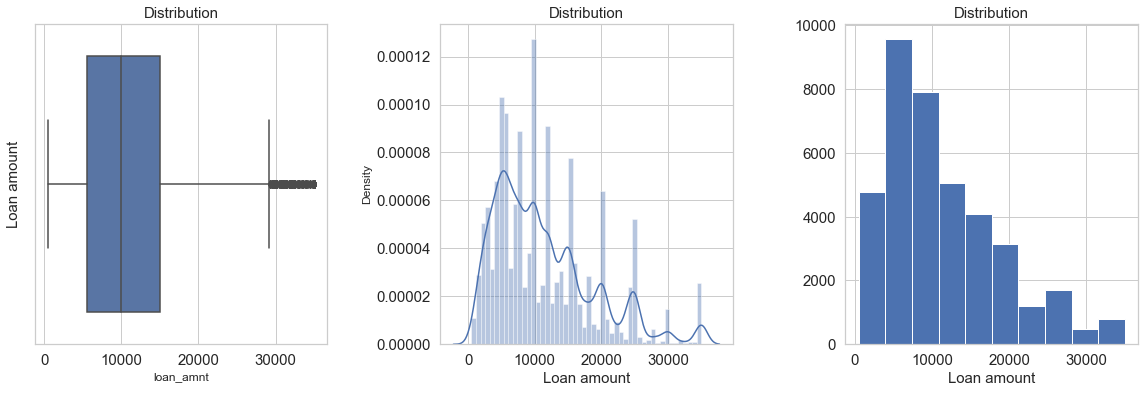

In [16]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(18,7))
fig.tight_layout(pad=8.0)

#boxplot
sns.boxplot(x='loan_amnt',data=loan,orient='v',ax=ax1)
ax1.set_ylabel('Loan amount', fontsize=15)
ax1.set_title('Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(loan['loan_amnt'], ax=ax2)
ax2.set_xlabel('Loan amount', fontsize=15)
ax2.set_title('Distribution', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(loan['loan_amnt'])
ax3.set_xlabel('Loan amount', fontsize=15)
ax3.set_title('Distribution', fontsize=15)
ax3.tick_params(labelsize=15)


In [17]:
## Zmienna annual income
print('Range of values: ', loan['annual_inc'].max()-loan['loan_amnt'].min())

Range of values:  5999500.0


In [18]:
print('Minimum income: ', loan['annual_inc'].min())
print('Maximum income: ',loan['annual_inc'].max())
print('Mean value: ', loan['annual_inc'].mean())
print('Median value: ',loan['annual_inc'].median())
print('Standard deviation: ', loan['annual_inc'].std())

Minimum income:  4000.0
Maximum income:  6000000.0
Mean value:  69618.35664462131
Median value:  60000.0
Standard deviation:  64222.44303320732


In [19]:
#Kwartyle i outliersy
Q1=loan['annual_inc'].quantile(q=0.25)
Q3=loan['annual_inc'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(loan['annual_inc']))

L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in loan amount: ', L_outliers)
print('Upper outliers in loan amount: ', U_outliers)

1st Quartile (Q1) is:  41496.0
3st Quartile (Q3) is:  83200.0
Interquartile range (IQR) is  41704.0
Lower outliers in loan amount:  -21060.0
Upper outliers in loan amount:  145756.0


In [20]:
print('Number of outliers in annual_inc upper : ', loan[loan['annual_inc']>145756.0]['annual_inc'].count())
print('Number of outliers in annual_inc lower : ', loan[loan['annual_inc']<-21060.0]['annual_inc'].count())
print('% of Outlier in annual_inc upper: ',round(loan[loan['annual_inc']>145756.0]['annual_inc'].count()*100/len(loan)), '%')
print('% of Outlier in annual_inc lower: ',round(loan[loan['annual_inc']<-21060.0]['annual_inc'].count()*100/len(loan)), '%')

Number of outliers in annual_inc upper :  1829
Number of outliers in annual_inc lower :  0
% of Outlier in annual_inc upper:  5 %
% of Outlier in annual_inc lower:  0 %


C:\Users\Monia\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Monia\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


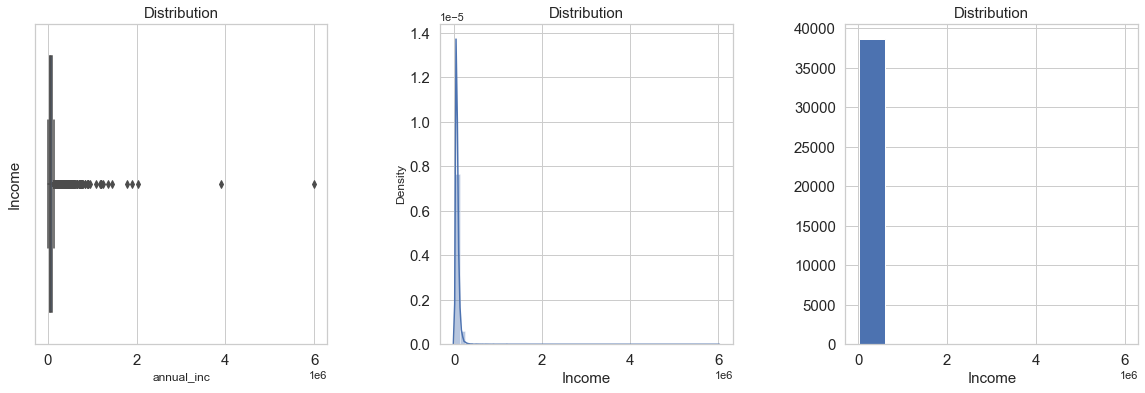

In [21]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(18,7))
fig.tight_layout(pad=8.0)

#boxplot
sns.boxplot(x='annual_inc',data=loan,orient='v',ax=ax1)
ax1.set_ylabel('Income', fontsize=15)
ax1.set_title('Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(loan['annual_inc'], ax=ax2)
ax2.set_xlabel('Income', fontsize=15)
ax2.set_title('Distribution', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(loan['annual_inc'])
ax3.set_xlabel('Income', fontsize=15)
ax3.set_title('Distribution', fontsize=15)
ax3.tick_params(labelsize=15)


In [22]:
## Zmienna revolving balance
print('Range of values: ', loan['revol_bal'].max()-loan['revol_bal'].min())

Range of values:  149588.0


In [23]:
print('Minimum balance: ', loan['revol_bal'].min())
print('Maximum balance: ',loan['revol_bal'].max())
print('Mean value: ', loan['revol_bal'].mean())
print('Median value: ',loan['revol_bal'].median())
print('Standard deviation: ', loan['revol_bal'].std())

Minimum balance:  0.0
Maximum balance:  149588.0
Mean value:  13468.20840653095
Median value:  8950.0
Standard deviation:  15924.871679909751


In [24]:
#Kwartyle i outliersy
Q1=loan['revol_bal'].quantile(q=0.25)
Q3=loan['revol_bal'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(loan['revol_bal']))

L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in balance: ', L_outliers)
print('Upper outliers in balance: ', U_outliers)

1st Quartile (Q1) is:  3746.75
3st Quartile (Q3) is:  17158.25
Interquartile range (IQR) is  13411.5
Lower outliers in balance:  -16370.5
Upper outliers in balance:  37275.5


In [25]:
print('Number of outliers in revol_bal upper : ', loan[loan['revol_bal']>37275.5]['revol_bal'].count())
print('Number of outliers in revol_bal lower : ', loan[loan['revol_bal']<-16370.5]['revol_bal'].count())
print('% of Outlier in revol_bal upper: ',round(loan[loan['revol_bal']>37275.5]['revol_bal'].count()*100/len(loan)), '%')
print('% of Outlier in revol_bal lower: ',round(loan[loan['revol_bal']<-16370.5]['revol_bal'].count()*100/len(loan)), '%')

Number of outliers in revol_bal upper :  2438
Number of outliers in revol_bal lower :  0
% of Outlier in revol_bal upper:  6 %
% of Outlier in revol_bal lower:  0 %


C:\Users\Monia\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Monia\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


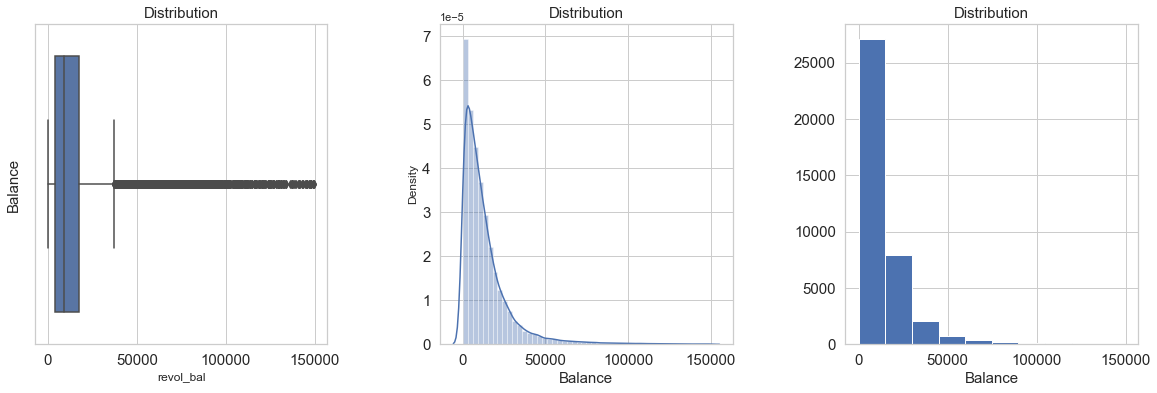

In [26]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(18,7))
fig.tight_layout(pad=8.0)

#boxplot
sns.boxplot(x='revol_bal',data=loan,orient='v',ax=ax1)
ax1.set_ylabel('Balance', fontsize=15)
ax1.set_title('Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(loan['revol_bal'], ax=ax2)
ax2.set_xlabel('Balance', fontsize=15)
ax2.set_title('Distribution', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(loan['revol_bal'])
ax3.set_xlabel('Balance', fontsize=15)
ax3.set_title('Distribution', fontsize=15)
ax3.tick_params(labelsize=15)

In [27]:
## Zmienna fico_range_high
print('Range of values: ', loan['fico_range_high'].max()-loan['fico_range_high'].min())

Range of values:  200.0


In [28]:
print('Minimum FICO: ', loan['fico_range_high'].min())
print('Maximum FICO: ',loan['fico_range_high'].max())
print('Mean value: ', loan['fico_range_high'].mean())
print('Median value: ',loan['fico_range_high'].median())
print('Standard deviation: ', loan['fico_range_high'].std())

Minimum FICO:  629.0
Maximum FICO:  829.0
Mean value:  718.6919241500465
Median value:  714.0
Standard deviation:  35.674940098901956


In [29]:
#Kwartyle i outliersy
Q1=loan['fico_range_high'].quantile(q=0.25)
Q3=loan['fico_range_high'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(loan['fico_range_high']))

L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in FICO: ', L_outliers)
print('Upper outliers in FICO: ', U_outliers)

1st Quartile (Q1) is:  689.0
3st Quartile (Q3) is:  744.0
Interquartile range (IQR) is  55.0
Lower outliers in FICO:  606.5
Upper outliers in FICO:  826.5


In [30]:
print('Number of outliers in fico_range_high upper : ', loan[loan['fico_range_high']>826.5]['fico_range_high'].count())
print('Number of outliers in fico_range_high lower : ', loan[loan['fico_range_high']<606.5]['fico_range_high'].count())
print('% of Outlier in fico_range_high upper: ',round(loan[loan['fico_range_high']>826.5]['fico_range_high'].count()*100/len(loan)), '%')
print('% of Outlier in fico_range_high lower: ',round(loan[loan['fico_range_high']<606.5]['fico_range_high'].count()*100/len(loan)), '%')

Number of outliers in fico_range_high upper :  2
Number of outliers in fico_range_high lower :  0
% of Outlier in fico_range_high upper:  0 %
% of Outlier in fico_range_high lower:  0 %


C:\Users\Monia\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Monia\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


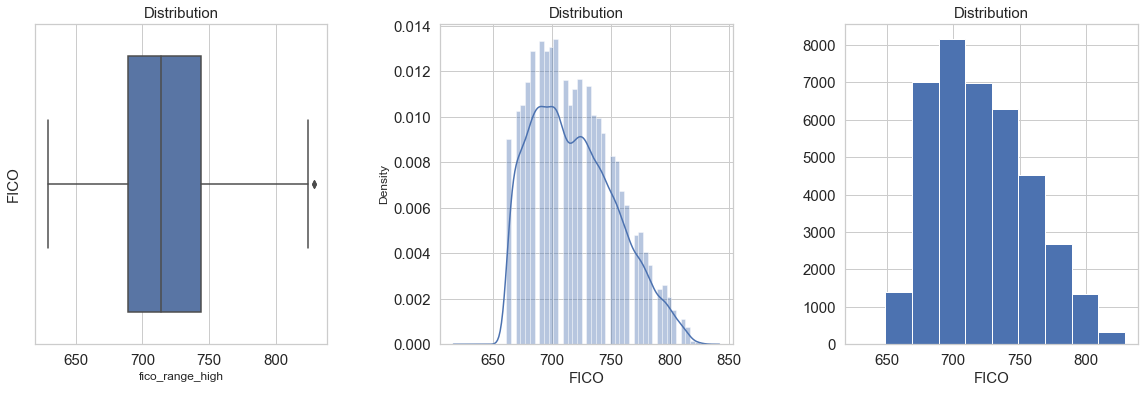

In [31]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(18,7))
fig.tight_layout(pad=8.0)

#boxplot
sns.boxplot(x='fico_range_high',data=loan,orient='v',ax=ax1)
ax1.set_ylabel('FICO', fontsize=15)
ax1.set_title('Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(loan['fico_range_high'], ax=ax2)
ax2.set_xlabel('FICO', fontsize=15)
ax2.set_title('Distribution', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(loan['fico_range_high'])
ax3.set_xlabel('FICO', fontsize=15)
ax3.set_title('Distribution', fontsize=15)
ax3.tick_params(labelsize=15)

## Multivariate analysis

1. W jaki sposób wynik FICO wiąże się z prawdopodobieństwem spłacenia pożyczki przez pożyczkobiorcę?
2. W jaki sposób wiek kredytowy wiąże się z prawdopodobieństwem niewykonania zobowiązania i czy ryzyko to jest niezależne lub związane z wynikiem FICO
3. W jaki sposób status kredytu hipotecznego na dom wiąże się z prawdopodobieństwem niewypłacalności?
4. W jaki sposób roczny dochód wiąże się z prawdopodobieństwem niewykonania zobowiązania?
5. W jaki sposób historia zatrudnienia wiąże się z prawdopodobieństwem niewykonania zobowiązania?
6. Jak wielkość żądanej pożyczki jest powiązana z prawdopodobieństwem niewykonania zobowiązania?

C:\Users\Monia\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Monia\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Monia\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='earliest_cr_line', ylabel='Density'>

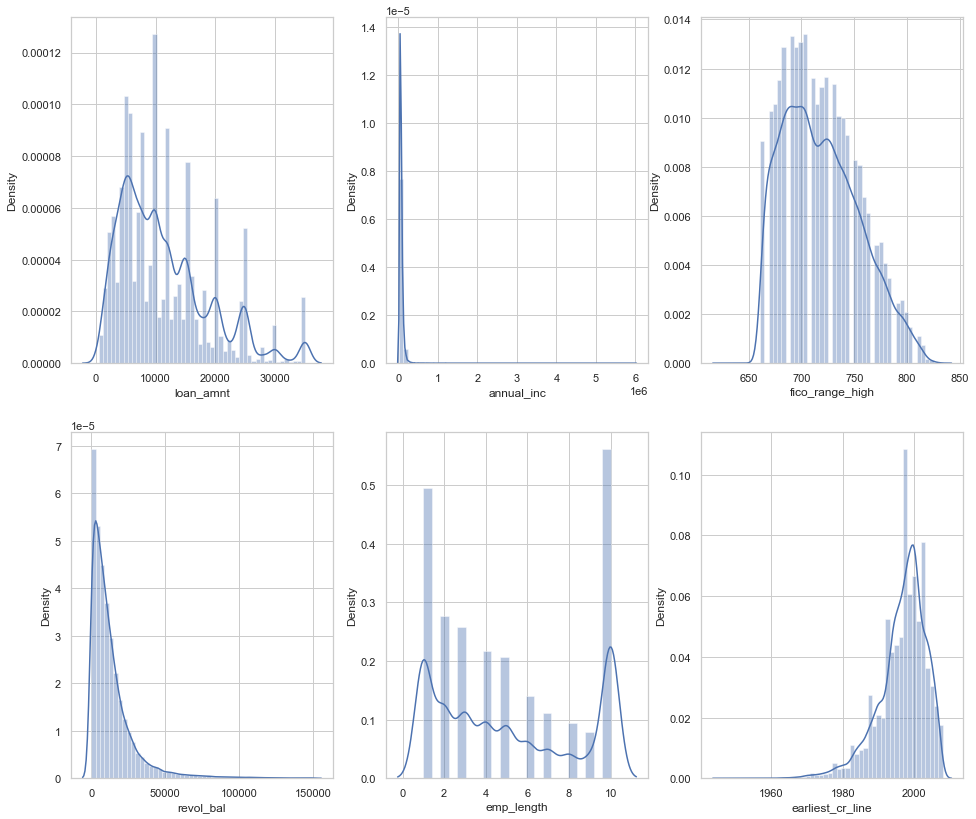

In [48]:
fig, ax2 = plt.subplots(2, 3, figsize=(16, 14))
sns.distplot(loan['loan_amnt'],ax=ax2[0][0])
sns.distplot(loan['annual_inc'],ax=ax2[0][1])
sns.distplot(loan['fico_range_high'],ax=ax2[0][2])
sns.distplot(loan['revol_bal'],ax=ax2[1][0])
sns.distplot(loan['emp_length'],ax=ax2[1][1])
sns.distplot(loan['earliest_cr_line'],ax=ax2[1][2])

<Figure size 432x288 with 0 Axes>

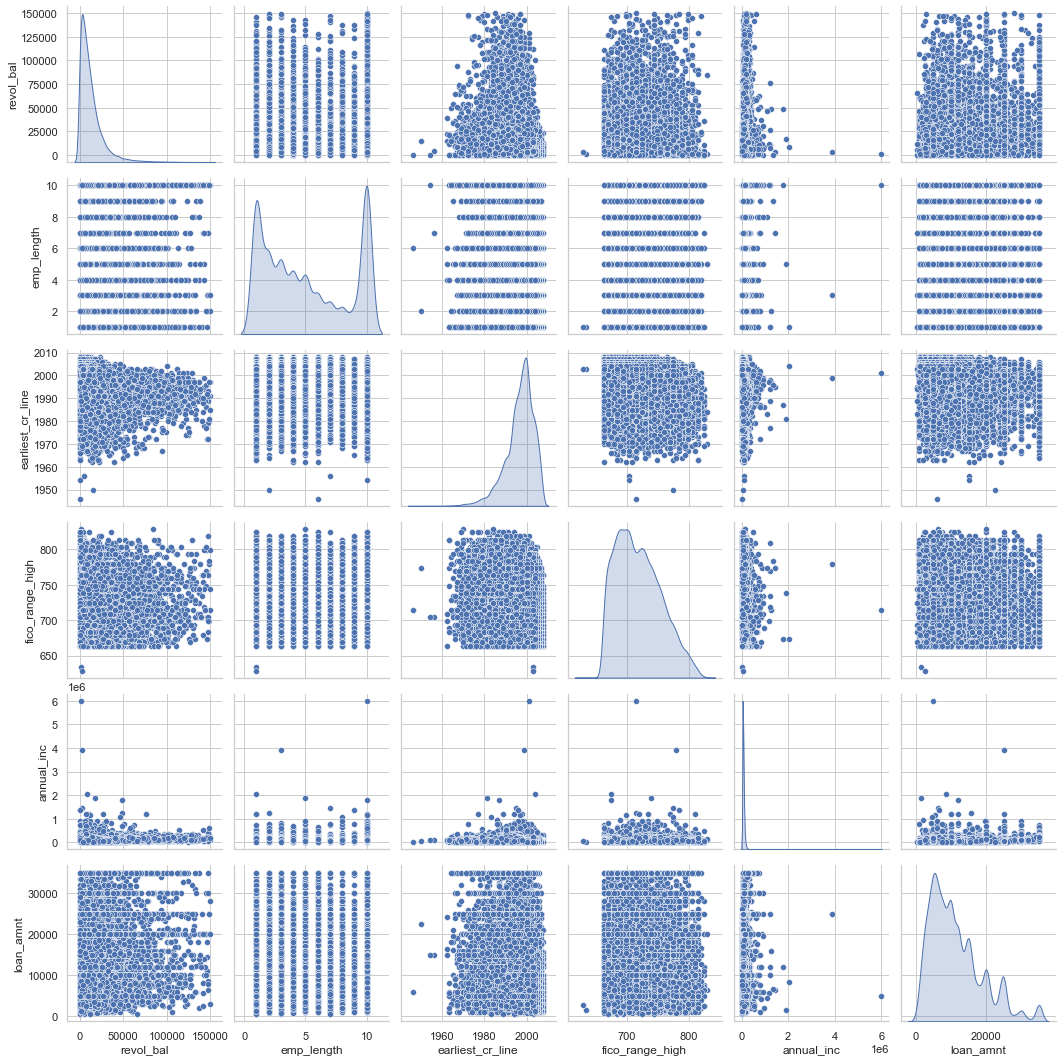

In [53]:
plt.figure()
sns.pairplot(loan, vars=['revol_bal', 'emp_length', 'earliest_cr_line', 'fico_range_high', 'annual_inc', 'loan_amnt'], diag_kind='kde')
plt.show()